In [1]:
import twiss.madx_configuration as configuration
import twiss.matrix_indexes as indexes
import twiss.particles_trajectory_generator as transporter
import visualization.visualize as plotter
import data.bunch_configuration as buc
import os
import matplotlib.pyplot as plt
import seaborn as sns
import ptc_twiss.madx_configuration as twiss_configuration
import ptc_twiss.matrix_indexes as twiss_indexes
import ptc_twiss.optics_parameters as twiss_optics_parameters
import ptc_track.madx_configuration as track_configuration
import ptc_track.matrix_indexes as track_indexes
import ptc_track.optics_parameters as track_optics_parameters
import visualization.optics_parameter_visualisation as plotter
import data.bunch_configuration as buc
import os
import matplotlib.pyplot as plt
import seaborn as sns
import visualization.visualize as plotter

In [2]:
sns.set_style("whitegrid")

Change below path for path to unziped folder

In [3]:
path_to_project = "/eos/user/r/rmucha/SWAN_projects"

In [4]:
path_to_project = "/home/rafalmucha/Pobrane/optic"
folder_name = "2017_matched"
script_file_name = "ptc_twiss_script.madx"
xml_file_name = "configuration_reco_beam1.xml"
path_to_script = os.path.join(path_to_project, folder_name, script_file_name)
s = 219.55
twiss_configuration = twiss_configuration.TwissConfiguration(path_to_script, s)
path_to_configuration = os.path.join(path_to_project, folder_name)
path_to_xml_file = os.path.join(path_to_project, folder_name, xml_file_name)
item_number = 2
track_configuration = track_configuration.TrackConfiguration(path_to_xml_file, item_number, path_to_configuration)

In [57]:
x_mean = 1149e-6
sigma_x = 1e-6
theta_x_mean = 140e-6
sigma_theta_x = 0
y_mean = 0
sigma_y = 0
theta_y_mean = 0
sigma_theta_y = 0
xa_mean = 0
sigma_xa = 0
pt_mean = 0
sigma_pt = 0

x_resolution = 11
theta_x_resolution = 1
y_resolution = 1
theta_y_resolution = 1
xa_resolution = 1
pt_resolution = 1

bunch_configuration = buc.GridConfiguration.from_sigma(x_mean, sigma_x, x_resolution,
                                                       theta_x_mean, sigma_theta_x, theta_x_resolution,
                                                       y_mean, sigma_y, y_resolution,
                                                       theta_y_mean, sigma_theta_y, theta_y_resolution,
                                                            xa_mean, sigma_xa, xa_resolution,
                                                        pt_mean, sigma_pt, pt_resolution)
grid_120_name = r"$\theta_x = 120\mu$rad "

In [58]:
title_sufix = "2017 matched, twiss"

In [59]:
segments = transporter.generate_from_range(madx_configuration=twiss_configuration, bunch_configuration=bunch_configuration)

/home/rafalmucha/Pobrane/optic/optics_generator_python/notebooks/twiss0
/home/rafalmucha/Pobrane/optic/optics_generator_python/notebooks/twiss2
/home/rafalmucha/Pobrane/optic/optics_generator_python/notebooks/twiss1
/home/rafalmucha/Pobrane/optic/optics_generator_python/notebooks/twiss3
twiss_madx_script
twiss_madx_script
twiss_madx_script
twiss_madx_script
/home/rafalmucha/Pobrane/optic/optics_generator_python/notebooks/twiss4
twiss_madx_script
/home/rafalmucha/Pobrane/optic/optics_generator_python/notebooks/twiss5
twiss_madx_script
/home/rafalmucha/Pobrane/optic/optics_generator_python/notebooks/twiss6
twiss_madx_script
/home/rafalmucha/Pobrane/optic/optics_generator_python/notebooks/twiss7
twiss_madx_script
/home/rafalmucha/Pobrane/optic/optics_generator_python/notebooks/twiss8
twiss_madx_script
/home/rafalmucha/Pobrane/optic/optics_generator_python/notebooks/twiss9
twiss_madx_script
/home/rafalmucha/Pobrane/optic/optics_generator_python/notebooks/twiss10
twiss_madx_script


In [60]:
matrix = segments["end"]

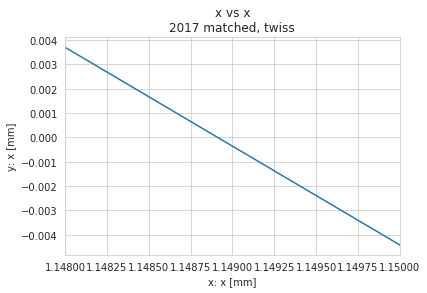

In [61]:
start_matrix = segments["start"]
end_matrix = segments["end"]
start_mapping = {
    "x": 0,
    "theta x": 1,
    "y": 2,
    "theta y": 3,
    "crossing angle": 4,
    "pt": 5
}
mapping = indexes.ptc_twiss
axes = plotter.plot_from_two_matrices("x", "x", start_matrix, end_matrix, start_mapping, mapping, title_sufix=title_sufix)

In [50]:
end_matrix

array([[ 2.19551000e+02,  7.68026529e-05, -9.09259720e-04,
         3.19654767e-06, -3.35533249e-05,  2.34209008e+01,
         3.05900219e+02,  3.38964996e-01,  2.72958980e-01,
         2.59611123e+00,  1.09518183e+01, -7.58825439e-02,
         1.20221957e-03,  0.00000000e+00],
       [ 2.19551000e+02,  6.05584466e-05, -9.09221404e-04,
         3.10922436e-06, -3.35531241e-05,  2.34208672e+01,
         3.05900287e+02,  3.38965067e-01,  2.72958977e-01,
         2.59610864e+00,  1.09518195e+01, -7.58663499e-02,
         1.20228747e-03,  0.00000000e+00],
       [ 2.19551000e+02,  4.43141994e-05, -9.09183089e-04,
         3.02190102e-06, -3.35529233e-05,  2.34208337e+01,
         3.05900354e+02,  3.38965139e-01,  2.72958975e-01,
         2.59610606e+00,  1.09518208e+01, -7.58501560e-02,
         1.20235537e-03,  0.00000000e+00],
       [ 2.19551000e+02,  2.80699591e-05, -9.09144773e-04,
         2.93457768e-06, -3.35527225e-05,  2.34208001e+01,
         3.05900421e+02,  3.38965210e-01,  2.

In [51]:
start_matrix

array([[0.00113 , 0.00014 , 0.      , 0.      , 0.      , 0.      ],
       [0.001134, 0.00014 , 0.      , 0.      , 0.      , 0.      ],
       [0.001138, 0.00014 , 0.      , 0.      , 0.      , 0.      ],
       [0.001142, 0.00014 , 0.      , 0.      , 0.      , 0.      ],
       [0.001146, 0.00014 , 0.      , 0.      , 0.      , 0.      ],
       [0.00115 , 0.00014 , 0.      , 0.      , 0.      , 0.      ],
       [0.001154, 0.00014 , 0.      , 0.      , 0.      , 0.      ],
       [0.001158, 0.00014 , 0.      , 0.      , 0.      , 0.      ],
       [0.001162, 0.00014 , 0.      , 0.      , 0.      , 0.      ],
       [0.001166, 0.00014 , 0.      , 0.      , 0.      , 0.      ],
       [0.00117 , 0.00014 , 0.      , 0.      , 0.      , 0.      ]])

IndexError: index 23 is out of bounds for axis 0 with size 14

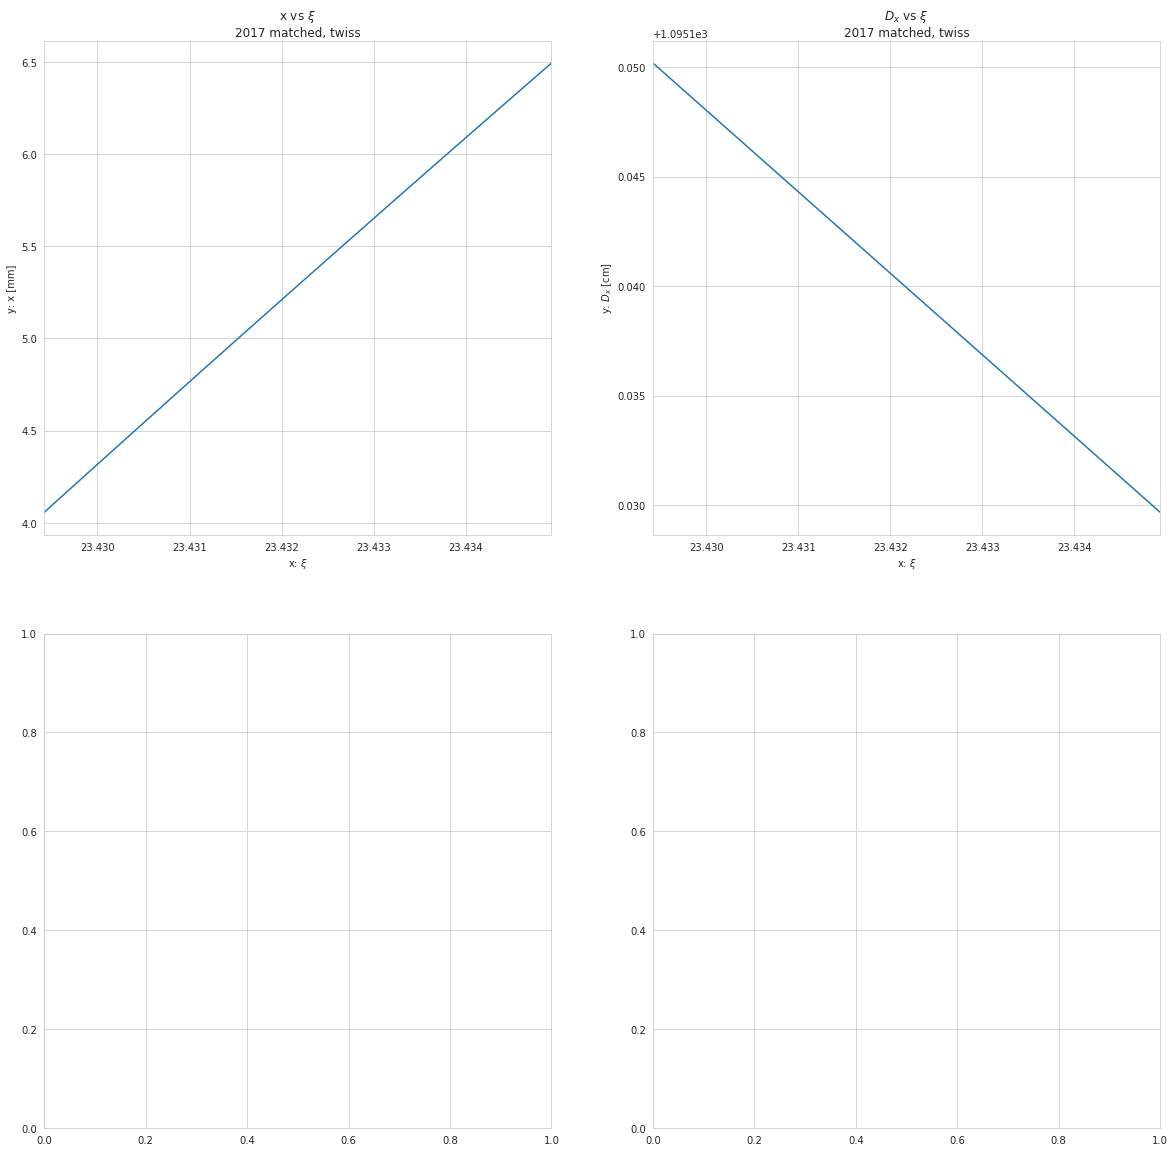

In [12]:
f, axes = plt.subplots(2, 2)

fig = plt.gcf()
fig.set_size_inches(20,20)

mapping = indexes.ptc_twiss

plotter.plot_from_one_matrix("pt", "x", matrix, mapping, axes, 0, 0, title_sufix=title_sufix)
plotter.plot_from_one_matrix("pt", "D x", matrix, mapping, axes, 0, 1, title_sufix=title_sufix)
plotter.plot_from_one_matrix("pt", "L y", matrix, mapping, axes, 1, 0, title_sufix=title_sufix)
plotter.plot_from_one_matrix("pt", "L x", matrix, mapping, axes, 1, 1, title_sufix=title_sufix)